### Örnek Calisma1: K-means Clustering ile Toy Calisma

In [1]:
# onemli kutuphaneleri import edelim

import numpy as np
# NumPy, bilimsel hesaplama ve veri analizi için yaygın olarak kullanılan bir kütüphanedir
from sklearn.datasets import make_blobs
#make_blobs: Bu fonksiyon, kümeleme algoritmalarını test etmek için yapay veri setleri oluşturur.

from sklearn.cluster import KMeans
#KMeans: K-Means algoritmasını kullanarak veri kümelerini kümelemede kullanılır.
import matplotlib.pyplot as plt

In [34]:
# veri setimizi olusturalim
X, y = make_blobs(
    n_samples=200, # Bu parametre, oluşturulacak toplam veri noktası sayısını belirtir. Bu örnekte 200 veri noktası oluşturulacaktır.
    n_features=2, # Her veri noktasının kaç özellik (feature) içereceğini belirtir. Bu örnekte her veri noktası 2 özellikten (2 boyutlu uzayda bir nokta) oluşacaktır.
    centers=3,  # Oluşturulacak küme sayısını belirtir. Bu örnekte 3 farklı küme (veya grup) oluşturulacaktır.
    cluster_std=0.5,
    # Her bir kümenin standart sapmasını belirtir. Küçük bir standart sapma değeri, kümelerin daha sıkı ve birbirine daha yakın olmasına neden olurken,
    # büyük bir değer kümelerin daha geniş alana yayılmasına neden olur. Bu örnekte standart sapma 0.5 olarak ayarlanmıştır.
    random_state=0 # Rastgele sayı üreteci için başlangıç (seed) değerini belirler. Bu parametre, aynı kod çalıştırıldığında aynı veri setini elde etmeyi sağlar.
  )

In [35]:
len(y)

200

In [36]:
y # noktalar hangi cluster'lara ait

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

#### Verimizi cizerek kesfedelim

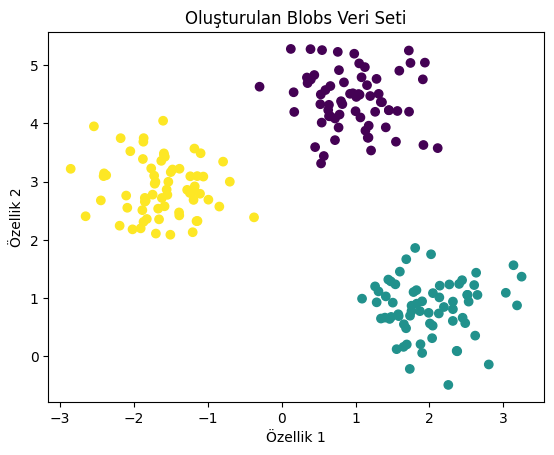

In [37]:
# Veri noktalarını görselleştirme
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
# X[:, 0]: Bu ifade, X veri setinin tüm satırlarını ve 0. sütununu (ilk özelliğini) seçer. Bu sütun, dağılım grafiğinin x eksenine karşılık gelir.
# X[:, 1]: Bu ifade, X veri setinin tüm satırlarını ve 1. sütununu (ikinci özelliğini) seçer. Bu sütun, dağılım grafiğinin y eksenine karşılık gelir.
# c=y: Bu parametre, veri noktalarının renklerinin y etiketlerine göre belirlenmesini sağlar. y burada her bir veri noktasının hangi kümeye ait olduğunu belirten etiketlerdir.
# cmap='viridis': Bu parametre, kullanılan renk haritasını (colormap) belirtir. 'viridis', Matplotlib'in sağladığı birçok renk haritasından biridir ve genellikle güzel bir görsel kontrast sağlar.

plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Oluşturulan Blobs Veri Seti')
plt.show()

#### Kmeans modelinin başlatılması

In [ ]:
kmeans = KMeans(
    n_clusters=3, #  küme sayısını belirtir. Bu örnekte, veriyi 3 kümeye bölmek istiyoruz.
    init='random', # Küme merkezlerinin başlangıç konumlarını belirtir. 'random' değeri, başlangıç merkezlerinin veri noktalarından rastgele seçileceğini belirtir.
    n_init=10,
    # KMeans algoritmasının farklı başlangıç merkezleri ile kaç kez çalıştırılacağını belirtir.
    # Genellikle bu değer yüksek seçilir (örneğin, 10) ve en iyi sonuç seçilir.
    max_iter=100,
    # KMeans algoritmasının her çalıştırmada kaç maksimum iterasyon yapacağını belirtir.
    # Bu örnekte, algoritma her çalıştırmada en fazla 10 iterasyon yapacaktır.
    # Genellikle bu değer daha yüksek seçilir (örneğin, 300) ancak burada örnek olması için küçük bir değer seçilmiştir.
    random_state=0
)

### KMeans Algoritmasının Çalışması:
KMeans, veriyi belirli sayıda kümeye ayıran bir kümeleme algoritmasıdır. Temel çalışma adımları şunlardır:
1. **Başlangıç Merkezlerini Seçme:** Belirtilen sayıda küme merkezi (centroid) rastgele seçilir veya belirli bir yöntemle belirlenir.
2. **Atama Adımı:** Her veri noktası, en yakın küme merkezine atanır.
3. **Güncelleme Adımı:** Küme merkezleri, kendilerine atanan veri noktalarının ortalaması alınarak güncellenir.
4. **Yakınsama Kontrolü:** Küme merkezlerinin değişimi belirli bir tolerans değeri altındaysa veya maksimum iterasyon sayısına ulaşılmışsa algoritma durur. Aksi halde, adım 2'ye geri dönülerek süreç tekrarlanır.

### Model Training and Prediction

In [ ]:
y_km = kmeans.fit_predict(X)

In [ ]:
y_km # her bir nokta hangi cluster'a karsilik geliyor (tahmin edilenler)

array([0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2,
       1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       1, 2], dtype=int32)

#### Son kümenin grafiğini çizelim

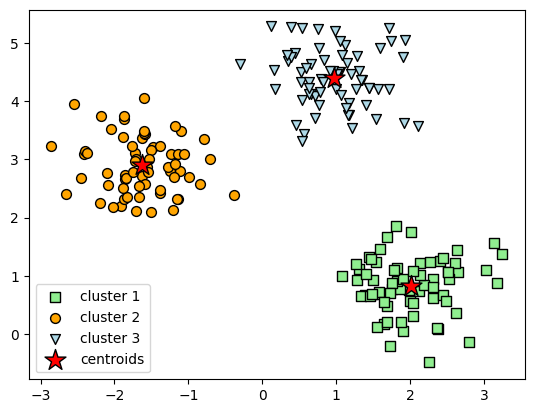

In [ ]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

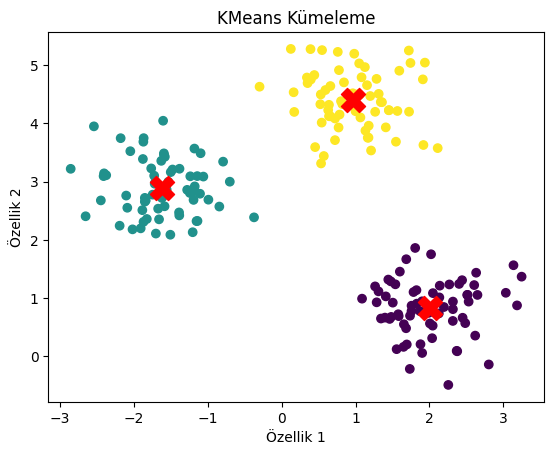

In [ ]:
kmeans.fit(X)

# Küme merkezlerini ve etiketleri alma
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Sonuçları görselleştirme
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('KMeans Kümeleme')
plt.show()

### Örnek Calisma2: K-means Clustering Iris veriseti

**Adımlar:**
1. Gerekli kütüphaneleri yükleyin ve veri setini hazırlayın.
2. K-means modelini oluşturun ve veriyi kümelere ayırın.
3. Sonuçları görselleştirin ve değerlendirin.

### Adım 0: Kullanacagimiz veri setini anlayalim..

Iris Veri Seti, 3 farklı türde İris çiçeklerinin bilgilerini içeren bir veri setidir.

Her bir çiçek için petal ve sepal (taç yaprak ve çanak yaprak) uzunluk ve genişliği ölçülmüştür.

150 adet bireyin ölçümleri ve tür bilgileri vardır.

https://en.wikipedia.org/wiki/Iris_flower_data_set

![Iris Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1200px-Iris_virginica_2.jpg)
Iris Virginica

![Iris Versicolor](https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg)
Iris Versicolor

![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg)
Iris Setosa

![petalVSsepal.png](https://biologyreader.com/wp-content/uploads/2022/05/sepals-vs-petals.jpg)
Taç Yaprak ve Çanak Yaprak

### Adım 1: Gerekli Kütüphaneleri Yükleme ve Veri Setini Hazırlama

Öncelikle gerekli kütüphaneleri yükleyin ve iris veri setini yükleyin.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# İris veri setini yükleme
iris = load_iris()


In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# İlk birkaç satırı görüntüleme
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Veri setimize bakalim, pandas bizim veri setimizi bize tarif etsin.

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster,pca_one,pca_two
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02
mean,5.843333,3.057333,3.758000,1.199333,1.000000,0.840000,-2.812565e-15,-8.929894e-16
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.803349,2.056269e+00,4.926162e-01
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,-3.223804e+00,-1.265971e+00
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,-2.530348e+00,-3.254152e-01
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000,5.546193e-01,-2.215678e-02
75%,6.400000,3.300000,5.100000,1.800000,2.000000,1.750000,1.550143e+00,3.249152e-01
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000,3.795645e+00,1.374165e+00


Veri setimizi ekledik, simdi eksik veri olup olmadigina bakalim.

In [ ]:
missing = df.isna().sum()  #eksik olan verileri her bir sutun icin topla
print(missing)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
cluster              0
pca_one              0
pca_two              0
dtype: int64


Veri setimizde hic bir eksik yok.

Olsaydı ne yapmalıyız?

Eksikli verileri silebiliriz.
Bolsuklari doldurabiliriz.
   Ortalama değer ile doldurabiliriz (mean)
   Ortanca değer ile doldurabiliriz (median)

In [ ]:
print(df.median())

sepal length (cm)    5.800000
sepal width (cm)     3.000000
petal length (cm)    4.350000
petal width (cm)     1.300000
species              1.000000
cluster              1.000000
pca_one              0.554619
pca_two             -0.022157
dtype: float64


In [ ]:
#eksik satirlari tamamen silmek icin
#df = df.dropna(axis=0) #axis 0 satirlar, axis 1 sütunlar

# eksik olsaydi bunu kullanabilirdik
#df = df.fillna( data.median() )  #ortanca
#df = df.fillna( data.mean() )  #ortalama

Veri setimizi görselleyelim. Verimize daha aşina oluruz.

Verilerimizin ne oldugun biliyoruz bu veri setinde (ama bilmiyormus gibi yapip bulmaya calisacagiz). Once bir verilerimize bakalim.

Çanak Yaprakların kalınlık ve uzunluklarına göre çizdirelim. Her bir türe ait bilgileri farklı bir renkte çizdirelim.

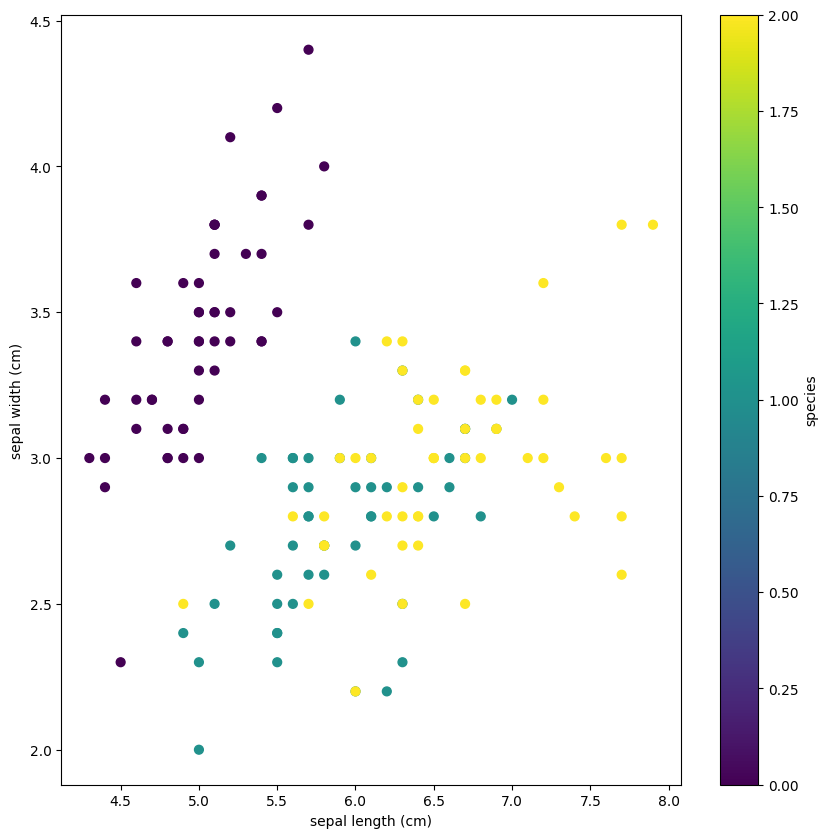

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10] # gorselimizin boyutunu ayarlayalim.

ax = df.plot.scatter(x='sepal length (cm)', y = 'sepal width (cm)', c='species',s=40, colormap='viridis')
plt.show()

Aynı işlemi taç yapraklar için yapalım.

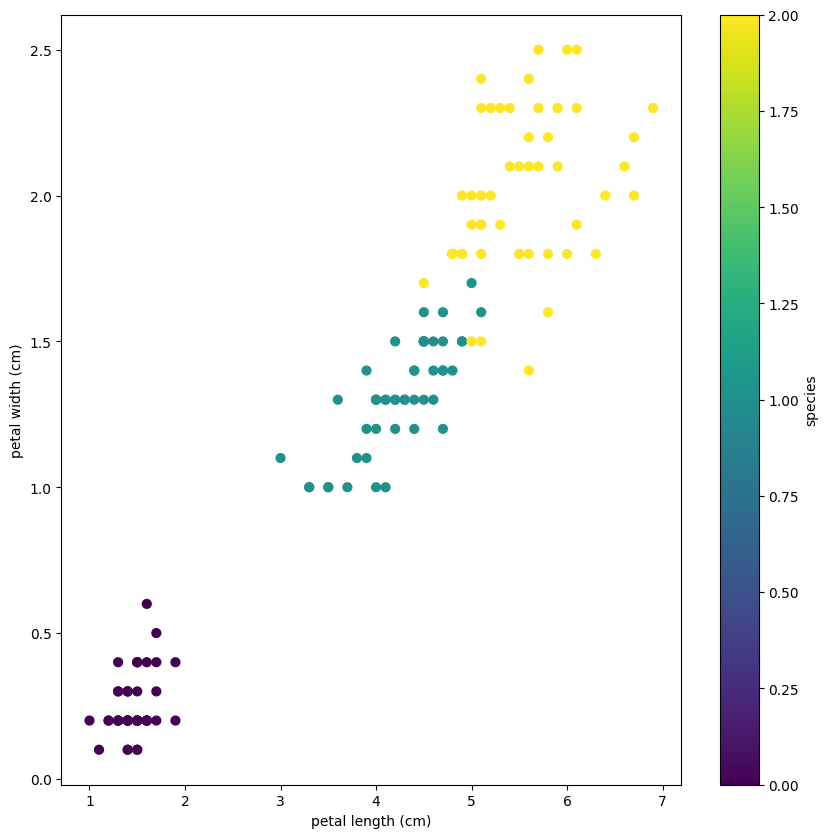

In [ ]:
ax2 = df.plot.scatter(x='petal length (cm)', y = 'petal width (cm)', c='species', s=40,colormap='viridis')
plt.show()

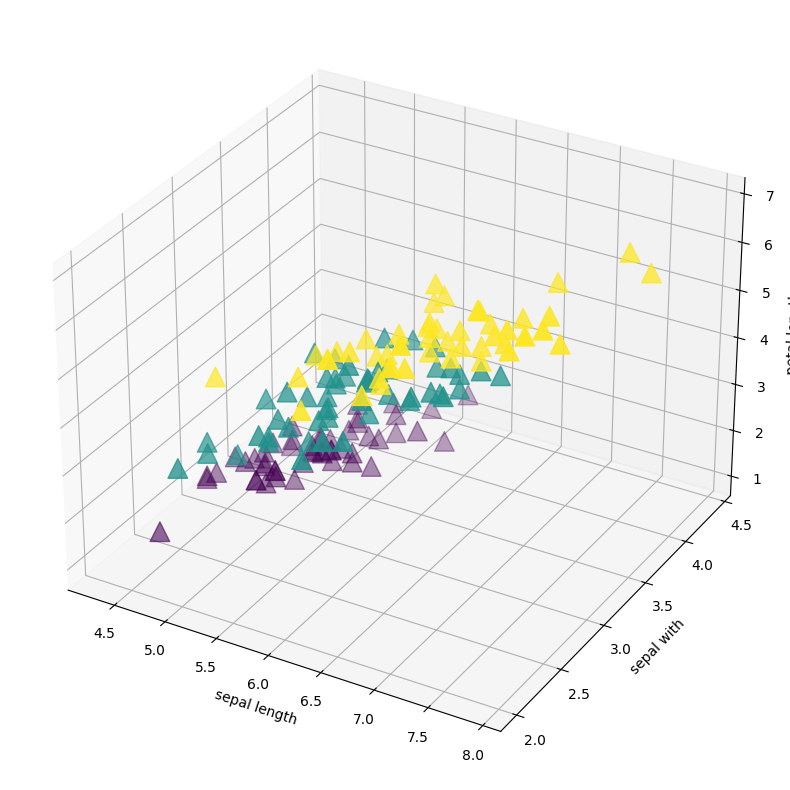

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'],c=df['species'],s=200, marker='^',cmap='viridis')


ax.set_xlabel('sepal length')
ax.set_ylabel('sepal with')
ax.set_zlabel('petal length')

plt.show()

### Adım 2: K-means Modelini Oluşturma ve Veriyi Kümelere Ayırma

K-means algoritmasını kullanarak veriyi kümelere ayıracağız.


In [ ]:
# Özellikleri ve hedef değişkeni ayırma
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# K-means modelini oluşturma
kmeans = KMeans(n_clusters=3, random_state=42) # burada K sayisini biliyoruz -- 3 cicek turu var, eger bilmeseydik elbow methoddan yararlanacaktik --> Nasil kodlanir? Arastirma odevi
kmeans.fit(X)

# Küme etiketlerini ekleme
df['cluster'] = kmeans.labels_

# Küme merkezlerini görüntüleme
print(kmeans.cluster_centers_)

[[ 6.85000000e+00  3.07368421e+00  5.74210526e+00  2.07105263e+00
   1.94736842e+00  2.00000000e+00  2.37446608e+00]
 [ 5.00600000e+00  3.42800000e+00  1.46200000e+00  2.46000000e-01
   0.00000000e+00  1.00000000e+00 -2.64241546e+00]
 [ 5.90161290e+00  2.74838710e+00  4.39354839e+00  1.43387097e+00
   1.22580645e+00 -1.22124533e-15  6.75662290e-01]]


/home/ece/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Adım 3: Sonuçları Görselleştirme ve Değerlendirme

PCA kullanarak veriyi 2D düzlemde görselleştirip kümeleri görselleştireceğiz.


- PCA, veri setindeki en önemli bilgileri daha az sayıda bileşenle ifade etmeye yarayan bir tekniktir.
- Amaç: Verideki karmaşıklığı azaltmak ve veriyi daha basit bir şekilde analiz edilebilir hale getirmektir.
- PCA, büyük veri setlerini daha yönetilebilir boyutlara indirgerken, verideki temel desenleri ve ilişkileri korur.

**PCA Neden Kullanılır?**

- Büyük veri setlerini daha anlaşılır ve işlenebilir hale getirmek.
- Verideki gereksiz veya tekrarlayan bilgileri elimine etmek.
- Analiz ve modelleme süreçlerini hızlandırmak ve kolaylaştırmak.

**PCA Nasıl Çalışır?**

- PCA, verideki en büyük değişiklikleri temsil eden yeni değişkenler oluşturur. Bu yeni değişkenlere "ana bileşenler" denir.
- İlk ana bileşen, verideki en büyük değişimi yakalar. İkinci ana bileşen, ilk bileşenden bağımsız olarak, verideki ikinci en büyük değişimi yakalar.
- Bu süreç, verideki en önemli desenleri ve ilişkileri koruyarak, veri boyutunu azaltır.

**PCA ve K-Means Kümeleme**

- PCA, K-Means kümeleme algoritması için veriyi hazırlamada çok yararlıdır.
- K-Means, veriyi kümelere ayırırken, PCA ile verinin boyutunu azaltmak ve önemli bilgileri korumak, kümeleme işleminin daha etkili olmasını sağlar.
- PCA ile veriyi daha basit ve anlamlı bileşenlere indirgeyerek, K-Means algoritmasının performansını artırabiliriz.

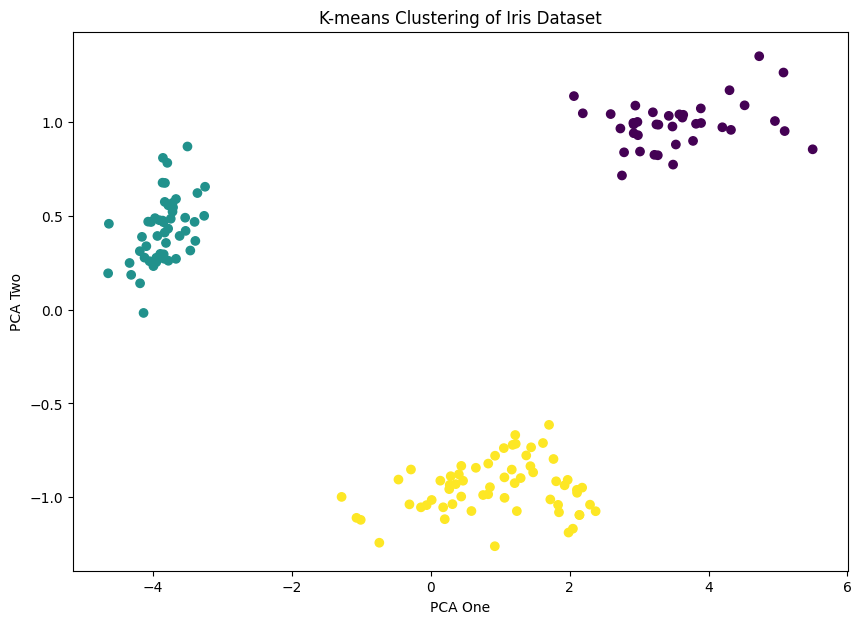

In [ ]:
# PCA kullanarak 2D düzleme indirgeme
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['pca_one'] = pca_result[:,0]
df['pca_two'] = pca_result[:,1]

# Kümeleri görselleştirme
plt.figure(figsize=(10, 7))
plt.scatter(df['pca_one'], df['pca_two'], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

### Sonuçları Değerlendirme

K-means clustering ile iris veri setindeki çiçekleri 3 kümeye ayırdık ve bu kümeleri PCA kullanarak görselleştirdik. K-means algoritması, verideki doğal grupları belirlemek ve görselleştirmek için etkili bir yöntemdir.

In [ ]:
# Add the predicted cluster labels to the DataFrame
#df['predicted_cluster'] = kmeans.labels_

# Display the first few rows of the DataFrame with the new cluster labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster,pca_one,pca_two,predicted_cluster
0,5.1,3.5,1.4,0.2,0,1,-3.909964,0.476566,1
1,4.9,3.0,1.4,0.2,0,1,-3.951027,0.276451,1
2,4.7,3.2,1.3,0.2,0,1,-4.189211,0.311304,1
3,4.6,3.1,1.5,0.2,0,1,-3.993350,0.231800,1
4,5.0,3.6,1.4,0.2,0,1,-3.970655,0.487265,1


### Elbow (Dirsek) Methodu ile cluster sayisi belirleyelim.

In [38]:
# Yapay bir veri seti oluşturma
X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    random_state=0
)


#### Kümelerin içindeki hata kareler toplamını (WSS) hesaplama

#### **WSS (Within-Cluster Sum of Squares) Nedir?**
WSS, her bir veri noktasının kendi küme merkezine (centroid) olan uzaklıklarının karelerinin toplamıdır. Bu metrik, küme içindeki noktaların ne kadar yakın olduğunu ölçer; daha düşük WSS değerleri, noktaların kendi küme merkezlerine daha yakın olduğunu ve daha kompakt kümeler oluşturduğunu gösterir.

#### Hesaplama Adımları:
1. **Kümeleme Modelini Eğitme:**
   - İlk olarak, veri seti üzerinde KMeans kümeleme algoritması uygulanır. KMeans algoritması, her küme için bir merkez (centroid) belirler ve veri noktalarını bu merkezlere göre kümeler.
   
2. **Küme İçindeki Uzaklıkları Hesaplama:**
   - Her bir veri noktası ile kendi küme merkezi arasındaki uzaklık hesaplanır. Uzaklık genellikle Öklidyen uzaklık (Euclidean distance) kullanılarak hesaplanır.

3. **Uzaklıkların Karelerinin Toplamını Almak:**
   - Her bir veri noktası için hesaplanan uzaklıkların kareleri alınır ve bu değerler toplanır. Bu, her küme için WSS değerini verir.

4. **Tüm Kümeler İçin WSS Değerlerinin Toplanması:**
   - Son olarak, tüm kümeler için hesaplanan WSS değerleri toplanarak toplam WSS değeri elde edilir.

### KMeans'in `inertia_` Özelliği:
Scikit-learn'de KMeans algoritması, eğitim tamamlandığında `inertia_` adında bir özellik sağlar. Bu özellik, toplam WSS değerini ifade eder.


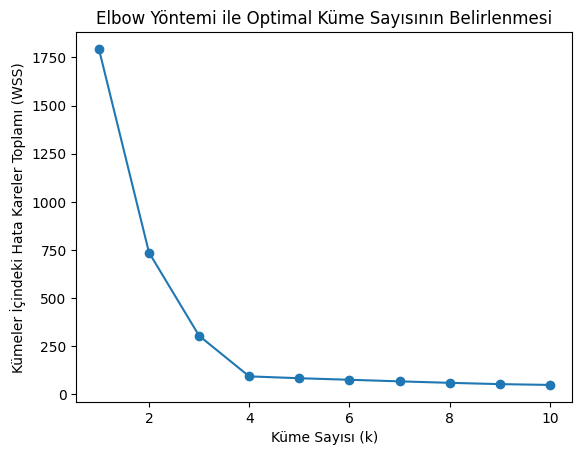

In [40]:
# Kümelerin içindeki hata kareler toplamını (WSS) hesaplama
wss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# Sonuçları görselleştirme
plt.plot(k_values, wss, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Kümeler İçindeki Hata Kareler Toplamı (WSS)')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısının Belirlenmesi')
plt.show()